In [5]:
import pandas as pd
import numpy as np
import mglearn
import graphviz
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

### MLP를 two_moons 데이터셋에 적용
- 은닉 유닛의 갯수는 따로 설정하지 않음(기본값 100개로 사용)

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

In [7]:
x, y = make_moons(n_samples=100, noise=0.25, random_state=3)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [8]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(x_train, y_train)

Text(0, 0.5, 'property 1')

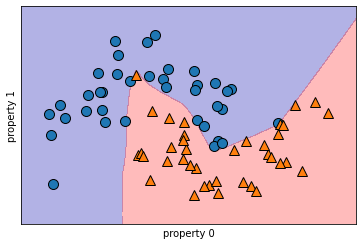

In [10]:
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')

In [12]:
#은닛유닛의 수 10개로 감소시켜주기
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'property 1')

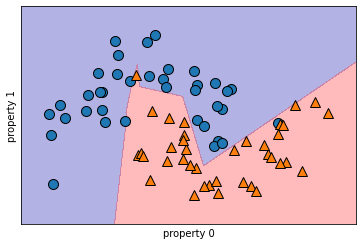

In [14]:
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')

#### 이 데이터셋에서 유닛의 개수를 줄여도 여전히 좋은 결과를 얻을 수 있음
#### 더 매끄러운 결정경계를 원할 경우 다음과 같은 매개변수 조정을 샐각할 수 있음
- 은닉유닛 추가
- 은닉층 추가
- 활성화 함수사용

In [17]:
#10개의 유닛으로 된 두개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10]).fit(x_train, y_train)

Text(0, 0.5, 'property 1')

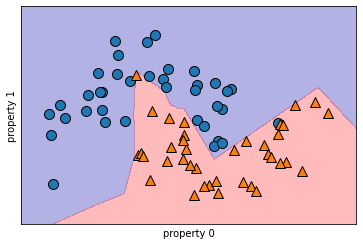

In [18]:
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')

In [19]:
#활성화 함수 추가
#10개의 유닛으로 된 두개의 은닉층

In [20]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10,10]).fit(x_train, y_train)

Text(0, 0.5, 'property 1')

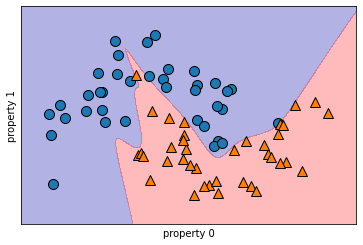

In [21]:
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.xlabel('property 0')
plt.ylabel('property 1')

#### 가중치
- MLP 신경망 모델도 리지회귀에서처럼 L2 패널티를 사용해서 가중치를 0에 가깝게 감소시켜 모델의 복잡도를 제어할 수 있음

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


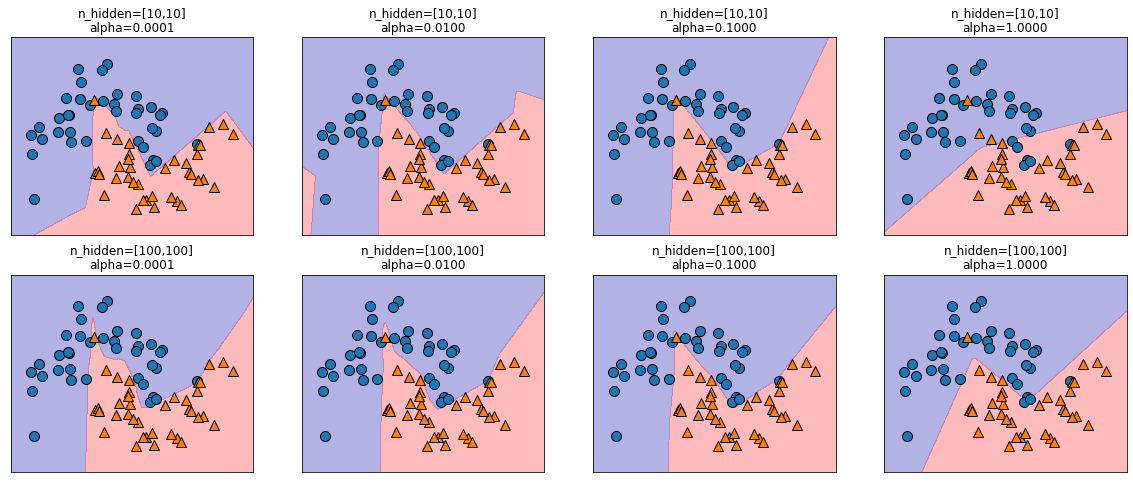

In [27]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))

for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha = alpha)
        mlp.fit(x_train, y_train)
        
        mglearn.plots.plot_2d_separator(mlp,x_train,fill=True, alpha=.3,ax=ax)
        mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train, ax=ax)
        ax.set_title('n_hidden=[{},{}]\nalpha={:.4f}'.format(n_hidden_nodes, n_hidden_nodes, alpha))
    